### **lightning ai 4 cpu 기반**
- ### **한글깨짐 방지**

In [2]:
%%capture cap
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### **재 시작**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import gzip
import pickle
import os

In [2]:
# 현재 디렉토리를 확인합니다.
current_dir = '/content/drive/MyDrive/이대과제/data_gzip'

# 파일 리스트를 가져옵니다.
file_list = [f for f in os.listdir(current_dir) if f.endswith('.pkl.gz')]

# 빈 데이터프레임 리스트를 생성합니다.
df_list = []

# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.
for file in file_list:
    try:
        with gzip.open(os.path.join(current_dir, file), 'rb') as f:
            data = pickle.load(f)
            df = pd.DataFrame(data)
            if not df.empty:
                df_list.append(df)
            else:
                print(f"Empty DataFrame in file: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# 빈 리스트가 아닌지 확인합니다.
if df_list:
    # 모든 데이터프레임을 하나로 합칩니다.
    df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

In [3]:
import numpy as np
# 동일 기사 삭제
df = df[~df.duplicated(['일자', '언론사', '제목'])]

# Function to extract text after '>'
def extract_text_after_symbol(text, symbol='>'):
    if isinstance(text, str):
        return text.split(symbol)[-1]
    return text

# Applying the function to each column using applymap
df[['통합 분류1', '통합 분류2', '통합 분류3']] = df[['통합 분류1', '통합 분류2', '통합 분류3']].applymap(lambda x: extract_text_after_symbol(x))

# 지역 구분
region = ['서울', '경기', '인천', '경북', '대구', '경남', '부산', '울산', '충남', '충북', '대전',
          '전북', '전남', '광주', '강원', '제주', ]

# sample데이터에서 region에 해당하는 값이 처음으로 나오는 데이터값만  갖는 새로운컬럼
df['지역'] = df.apply(lambda x: x['통합 분류1'] if x['통합 분류1'] in region else (x['통합 분류2'] ##
                                                                                  if x['통합 분류2'] in region else (x['통합 분류3'] ##
                                                                                                                 if x['통합 분류3'] in region else np.nan)), axis=1)
# 지역이 있는 행만 선택
df.dropna(subset=['지역'], inplace=True)

# 필요컬럼만 추출
#df= df[['일자', '특성추출(가중치순 상위 50개)', '지역']]

# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)

df

,일자,언론사,제목,통합 분류1,통합 분류2,통합 분류3,기관,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,제민일보,김석주 부장앞/ 인터뷰 기사 앞서 본문 기사 보냅니다.,제주,학술_문화재,전북,"위주,제주문화예술재단,제주어심의위원회,대상,국어문화원,제주대,제주어,국립국어원","제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,한라일보,[물의 시대](1)프롤로그,제주,자원,산업_기업,"제주용천수,용천수,제주대,수자원,제주대학교,제주물산업,제주도,제주하이테크산업진흥원,...","제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,경남신문,몸 버리는 음주 No! 감성 살찌우는 ‘문화 송년회’,경남,부산,경북,"청아병원,성동조선해양(주),메니큐어전자현악단,CECO,(주)경원벤딩","송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,국제신문,학교에서 아침밥 ＂꿈도 함께 자랍니다＂,교육_시험,경기,경남,"금사초등학교,부산시교육청","아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,광남일보,[2010새해특집]지방선거 누가뛰나-완도군수,선거,국회_정당,경남,"농수산식품부,기초자치단체,민주당,전남도의원,초미,서남권,후보군","3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
7140009,2024-05-21,아시아경제,닷새만에 102만명 찾은 서울국제정원박람회 최단기간 최다방문,전시_공연,미술_건축,전남,"작가정원,서울시","서울,서울시,박람회,뚝섬한강공원,한강,102만,최단기간,특별전,나들,이수연,본행사,...",전남,2024,5
7140012,2024-05-21,중도일보,"이상일 시장, 용인삼계고 ‘미래교육환경개선사업 3.0' 준공식 참석",대전,경기,충남,"교육지원청,용인삼계고등학교,용인삼계고,용인교육지원청,대한민국","용인삼계고,용인삼계고등학교,통학버스,대한민국,도서관,기념식,운동장,학생들,이상일,김...",대전,2024,5
7140019,2024-05-21,중부일보,"가평군, '제1회 행복한 가평, 건강대축제' 개최",의료_건강,충북,경기,"가평군청,보건소","가평,보건소,행사장,부스,피크닉콘서트,방문객,치매조기,건강놀이터,운동체험,가평군청,...",충북,2024,5
7140026,2024-05-21,매일신문,"창녕교육지원청, 21일 어린이통학버스 안전 및 노선점검 실시",충남,교육_시험,강원,"대지초등학교,교육장","통학버스,교육장,상반기,안전사고,지원청,노선점검,창녕교육지원청,농기계,창녕,학부모,...",충남,2024,5


### <font color='red'> **데이터 다시 읽기**

In [4]:
#df.to_pickle('/content/drive/MyDrive/이대과제/data/df.pkl')
%time df = pd.read_pickle('/content/drive/MyDrive/이대과제/data/df.pkl')
df

CPU times: user 7.2 s, sys: 4.79 s, total: 12 s
Wall time: 13.4 s


,일자,언론사,제목,통합 분류1,통합 분류2,통합 분류3,기관,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,제민일보,김석주 부장앞/ 인터뷰 기사 앞서 본문 기사 보냅니다.,제주,학술_문화재,전북,"위주,제주문화예술재단,제주어심의위원회,대상,국어문화원,제주대,제주어,국립국어원","제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,한라일보,[물의 시대](1)프롤로그,제주,자원,산업_기업,"제주용천수,용천수,제주대,수자원,제주대학교,제주물산업,제주도,제주하이테크산업진흥원,...","제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,경남신문,몸 버리는 음주 No! 감성 살찌우는 ‘문화 송년회’,경남,부산,경북,"청아병원,성동조선해양(주),메니큐어전자현악단,CECO,(주)경원벤딩","송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,국제신문,학교에서 아침밥 ＂꿈도 함께 자랍니다＂,교육_시험,경기,경남,"금사초등학교,부산시교육청","아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,광남일보,[2010새해특집]지방선거 누가뛰나-완도군수,선거,국회_정당,경남,"농수산식품부,기초자치단체,민주당,전남도의원,초미,서남권,후보군","3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
7140009,2024-05-21,아시아경제,닷새만에 102만명 찾은 서울국제정원박람회 최단기간 최다방문,전시_공연,미술_건축,전남,"작가정원,서울시","서울,서울시,박람회,뚝섬한강공원,한강,102만,최단기간,특별전,나들,이수연,본행사,...",전남,2024,5
7140012,2024-05-21,중도일보,"이상일 시장, 용인삼계고 ‘미래교육환경개선사업 3.0' 준공식 참석",대전,경기,충남,"교육지원청,용인삼계고등학교,용인삼계고,용인교육지원청,대한민국","용인삼계고,용인삼계고등학교,통학버스,대한민국,도서관,기념식,운동장,학생들,이상일,김...",대전,2024,5
7140019,2024-05-21,중부일보,"가평군, '제1회 행복한 가평, 건강대축제' 개최",의료_건강,충북,경기,"가평군청,보건소","가평,보건소,행사장,부스,피크닉콘서트,방문객,치매조기,건강놀이터,운동체험,가평군청,...",충북,2024,5
7140026,2024-05-21,매일신문,"창녕교육지원청, 21일 어린이통학버스 안전 및 노선점검 실시",충남,교육_시험,강원,"대지초등학교,교육장","통학버스,교육장,상반기,안전사고,지원청,노선점검,창녕교육지원청,농기계,창녕,학부모,...",충남,2024,5


<Axes: xlabel='지역'>

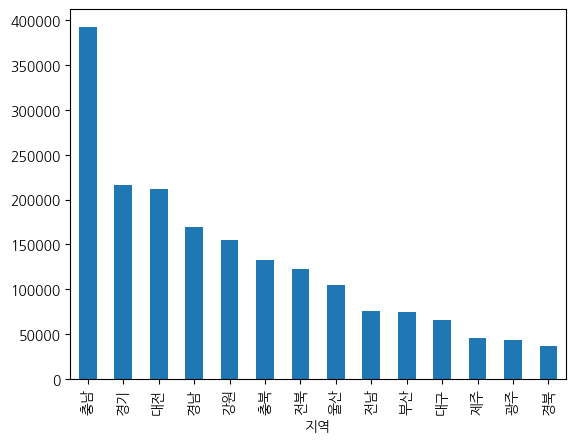

In [65]:
df['지역'].value_counts().plot(kind='bar')

### **1. 지역별 년도별 검색어**

<Axes: >

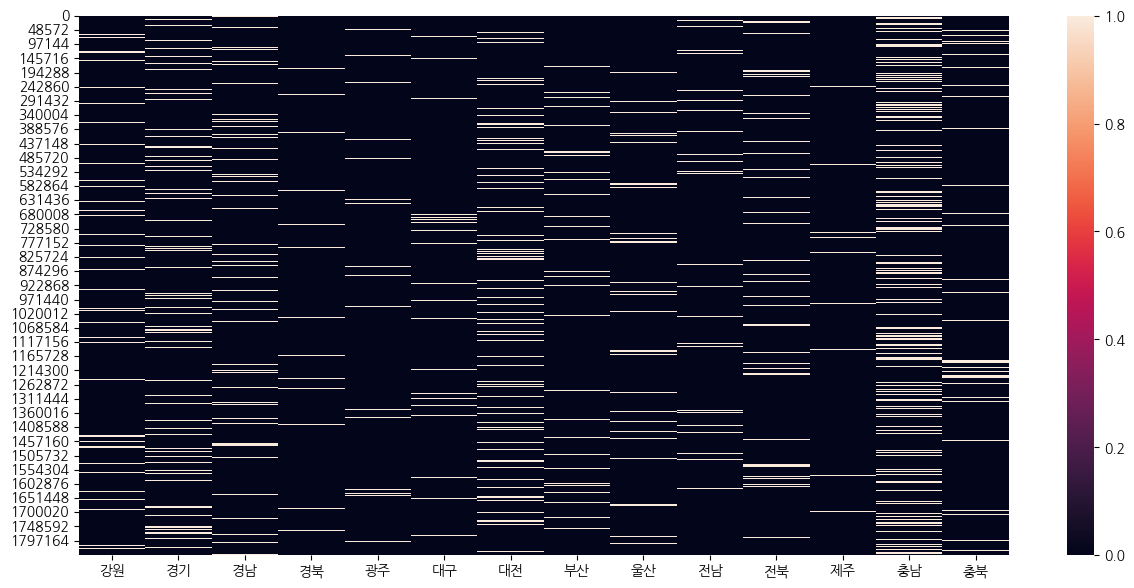

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corpus = []
for text in df['지역']:
    corpus.append(text)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
plt.figure(figsize=(15, 7))
sns.heatmap(data)

<Axes: xlabel='년도', ylabel='지역'>

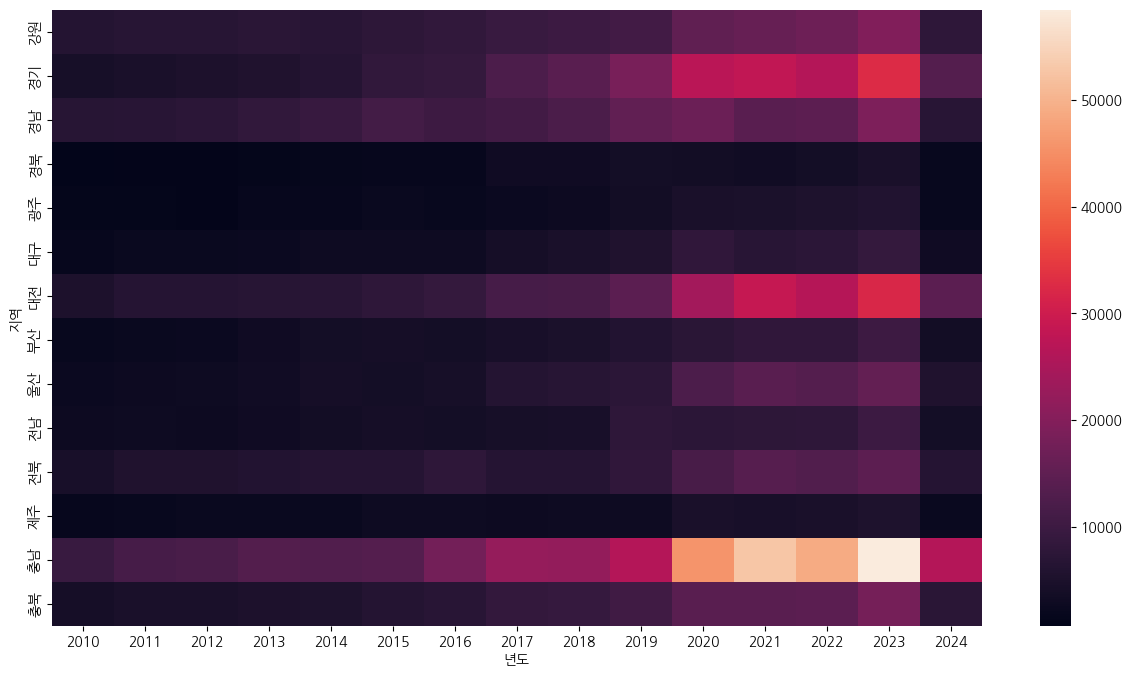

In [7]:
# Create a pivot table with year as columns and region as rows
pivot_table = pd.pivot_table(df, index='지역', columns='년도', values='특성추출(가중치순 상위 50개)', aggfunc='count')

# Print the pivot table
# Set the figure size
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table)

### **필요한 컬럼만 읽기**

In [5]:
df = df[['일자','특성추출(가중치순 상위 50개)', '지역', '년도', '월']]
df.head()

,일자,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,"제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,"제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,"송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,"아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,"3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1


### **검색어 정리하기**

In [6]:
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/data/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)

keywords_df

,제1차 어린이식생활안전관리 종합계획 (2010~2012),제2차 어린이식생활안전관리 종합계획 (2013~2015),제3차 어린이식생활안전관리 종합계획 (2016~2018),제4차 어린이식생활안전관리 종합계획 (2019~2021),제5차 어린이식생활안전관리 종합계획 (2022~2024),제6차 어린이식생활안전관리 종합계획 수립 추진계획 (2025~2027)
1,안전한 식품,식품안전보호구역,고카페인 식품,식품안전,기호식품,기호식품
2,바른 영양,기호식품,알레르기 표시,기호식품,단체급식,단체급식
3,건강한 어린이,단체급식,광고 제한,단체급식,저염식품,영양표시
4,기호식품,영양표시,급식관리지원센터,저염식품,저당식품,고열량 식품
5,단체급식,식생활교육,저당음료,알레르기 식품,알레르기,자율협약
6,영양교육,협력강화,영양교육,영양교육,스마트 급식관리,빅데이터
7,식품표시,지자체 지원,나트륨 저감화,빅데이터,빅데이터,영양교육
8,HACCP,예방관리,영양표시 개선,광고 관리,광고 제한,안전관리
9,식중독 예방,식품안전성,식품안전성,안전관리,온라인 환경,식품안전법
10,품질관리,위생수준,급식위생,영양표시,맞춤형 지원,식중독 예방


In [7]:
# 데이터프레임을 원하는 구조로 변경
melted_df = keywords_df.melt(var_name="계획", value_name="내용")
# 계획 컬럼에서 계획 번호만 추출
melted_df["계획"] = melted_df["계획"].str.extract(r'(제\d차)')
# 컬럼 이름 변경 및 순서 변경
result_df = melted_df.rename(columns={"내용": "컬럼1", "계획": "컬럼2"})[['컬럼1', '컬럼2']]
result_df.columns = ['검색어', '계획']

# 추가 검색어 from 이대
search_words = ['당류', '나트륨', '어린이기호식품', '아동청소년 식품구입', '스쿨존', '학원주변',
                '우수판매업소', '건강먹거리코너', '지속가능한 식생활', '어린이급식관리지원센터', '튼튼버스']

extra_df = pd.DataFrame(search_words, columns=['검색어']); extra_df['계획'] = '추가'
final_df = pd.concat([result_df, extra_df]).reset_index(drop=True)
# final_df의 검색어 컬럼의 각 단어는 space로 분리하여 다른 행으로 만들기
final_df = final_df.assign(검색어=final_df['검색어'].str.split(' ')).explode('검색어')
final_df.to_excel('차수별검색어_추가검색어_20240611.xlsx', index=False)
final_df

,검색어,계획
0,안전한,제1차
0,식품,제1차
1,바른,제1차
1,영양,제1차
2,건강한,제1차
...,...,...
187,건강먹거리코너,추가
188,지속가능한,추가
188,식생활,추가
189,어린이급식관리지원센터,추가


### **고유한 검색어 개수 세팅(중복 검색어는 제외)**

In [8]:
search_words= final_df['검색어'].unique().tolist()
len(search_words)

107

## **1. 지역 및 연도별 키워드 검색어 출현빈도 분석**
- 전체 검색어로 지역별 년도별 추이
- 시작년도, 끝년도 지정

In [15]:
# 검색어 리스트
print('. '.join(search_words))

# 지역 구분
tf = df.groupby(['지역'])

regions= [t for t, _ in tf.groups.items()]
regions

안전한. 식품. 바른. 영양. 건강한. 어린이. 기호식품. 단체급식. 영양교육. 식품표시. HACCP. 식중독. 예방. 품질관리. 학교. 급식. 식습관. 식품안전보호구역. 저염식. 저당식. 영양성분. 위생관리. 캠페인. 식품안전법. 정부. 협력. 소비자. 참여. 우수식품. 고열량. 저영양. 위생교육. 식품안전지수. 결식아동. 알레르기. 주변. 건강. 식생활. 온라인. 영양표시. 식생활교육. 협력강화. 지자체. 지원. 예방관리. 식품안전성. 위생수준. 위생. 학교급식. 고열량식품. 저영양식품. 품질인증. 식품광고. 정책. 추진. 지침. 확대. 식품판매. 지역사회. 식품위생법. 급식기준. 나트륨. 저감화. 당류. 영양관리. 고카페인. 학부모. 교육. 체험교육. 표시. 광고. 제한. 급식관리지원센터. 저당음료. 개선. 급식위생. 보호구역. 데이터. 수집. 콘텐츠. 학교주변. 식품안전. 저염식품. 빅데이터. 관리. 안전관리. 식품산업. 식생활지침. 저당식품. 스마트. 급식관리. 환경. 맞춤형. 기반. 중앙센터. 자율협약. 성장과정별. 어린이기호식품. 아동청소년. 식품구입. 스쿨존. 학원주변. 우수판매업소. 건강먹거리코너. 지속가능한. 어린이급식관리지원센터. 튼튼버스


['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '울산',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

In [12]:
tf.head()

,일자,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,"제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,"제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,"송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,"아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,"3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1
...,...,...,...,...,...
576,2010-01-21,"경찰서,전남,일자리,주요국,상반기,노인들,지자체,65세,경쟁률,88만,실업자,저소득...",광주,2010,1
592,2010-01-21,"일자리,부산,대책반,부시장,부산시,협력반,배영길,노동청,공감대,기업유치,8만,상황실...",부산,2010,1
687,2010-01-25,"대한적십자사,부산,울산,금정산,동사무소,사하구,동구청,서면역,월례회,부산유스호스텔,...",부산,2010,1
853,2010-01-29,"대구,교차로,운전자,꼬리물기,범칙금,대구지방경찰청,20곳,집중단속,경찰청,경찰관,최...",경북,2010,1


### **지역별로 검색어를 년도순서로 muliti index한 후 데이터프레임으로 저장**
- 10개의 검색어를 선택하여 데이터만들고 등고선 그림그리기

In [13]:
import random
search_words_random = random.sample(search_words, 10)
search_words_random

['개선', '체험교육', '콘텐츠', '고열량', '식습관', '광고', '급식기준', '품질관리', '어린이기호식품', '지속가능한']

In [16]:
from  tqdm import tqdm
import numpy as np

# Your main processing loop
# Main processing loop
result_dict = {}
for keyword in tqdm(search_words_random):
    for terra in regions:
        start_year = 2010
        end_year = 2024
        result_df1 = pd.DataFrame(index=[keyword])

        sf = tf.get_group(terra)

        for year in range(start_year, end_year + 1):
            start_date = f"{year}-01-01"
            end_date = f"{year}-12-31"
            st_index = (sf['일자'] >= start_date) & (sf['일자'] <= end_date)
            temp_sf = sf[st_index]

            # Create the corpus for the year
            corpus_yearly = " ".join(temp_sf['특성추출(가중치순 상위 50개)'].tolist())

            # Count the occurrences of the keyword in the yearly corpus
            count = corpus_yearly.count(keyword)

            # Add the count to the result DataFrame
            result_df1[str(year)] = [count]

        # Store the result DataFrame in the dictionary
        result_dict[f'{terra}_{keyword}'] = result_df1

# Create the desired format
multi_index_data = []
for key, df in result_dict.items():
    region_name, keyword = key.split('_')
    for col, value in df.iloc[0].items():
        multi_index_data.append([region_name, keyword, f"{col}년", value])

# Ensure all years are covered for each Region and Keyword
all_years = [f"{year}년" for year in range(2010, 2025)]
complete_data = []

for terra in regions:
    for keyword in search_words_random:
        for year in all_years:
            found = False
            for record in multi_index_data:
                if record[0] == terra and record[1] == keyword and record[2] == year:
                    complete_data.append(record)
                    found = True
                    break
            if not found:
                complete_data.append([terra, keyword, year, 0])

# Create a DataFrame from the complete data
multi_index_df = pd.DataFrame(complete_data, columns=['Region', 'Keyword', 'Year', 'Value'])
multi_index_df.set_index(['Region', 'Keyword', 'Year'], inplace=True)

multi_index_df

100%|██████████| 10/10 [00:36<00:00,  3.63s/it]


Value
Region Keyword Year        
강원     개선      2010년    226
               2011년    175
               2012년    233
               2013년    187
               2014년    178
...                     ...
충북     지속가능한   2020년      0
               2021년      0
               2022년      0
               2023년      0
               2024년      0

[2100 rows x 1 columns]

In [17]:
dt = multi_index_df.unstack().reset_index()
dt.head(30)

Region  Keyword Value                                                  \
Year                 2010년 2011년 2012년 2013년 2014년 2015년 2016년 2017년 2018년   
0        강원       개선   226   175   233   187   178   178   279   337   344   
1        강원      고열량     5    12    12     4     7     9    10    17    14   
2        강원       광고   115   185   133   180    98   147   205   202   192   
3        강원     급식기준     2     0     1     0     0     0     0     0     0   
4        강원      식습관    38    70    47    46    81    80    87    87    80   
5        강원  어린이기호식품     1     3     1     2     2     0     2     0     4   
6        강원    지속가능한     0     0     0     0     0     0     0     0     0   
7        강원     체험교육     6     2     9     3    11     7    12    24    19   
8        강원      콘텐츠    27    34    36    27    42    34    66    62    66   
9        강원     품질관리   120   121   140   175   121    93    78   105   107   
10       경기       개선   202   224   253   248   300   373   482   595   650   
11       경기      고열량    10     3     7     2     2     3     2     5     4   
12       경기       광고    78   102   108   147    96   161   125   136   207   
13       경기     급식기준     0     0     0     0     0     0     0     0     0   
14       경기      식습관    17    23    24    17    21    22    33    37    38   
15       경기  어린이기호식품     0     0     0     0     0     1     0     0     0   
16       경기    지속가능한     0     0     0     0     0     0     0     0     0   
17       경기     체험교육     4     4     1     5     4     2     1    14    12   
18       경기      콘텐츠    33    36    71    60   140   122   162   204   244   
19       경기     품질관리    39    65    43    53    61    42    57    76    99   
20       경남       개선   183   165   172   208   235   244   292   261   336   
21       경남      고열량     5    10    15     9    11     4     4     5     3   
22       경남       광고   159   161   170   156   111   206   208   372   491   
23       경남     급식기준     0     0     0     0     0     0     0     0     0   
24       경남      식습관    77    84    84    81    72    93   110   118   110   
25       경남  어린이기호식품     0     1     1     1     0     0     0     0     0   
26       경남    지속가능한     0     0     0     0     0     0     0     0     0   
27       경남     체험교육     1     8     6     4    26    14    18    27    25   
28       경남      콘텐츠    43    39    61    63    48    75    79   125   101   
29       경남     품질관리    43    55    51    80    64    61    86    89    62   

                                          
Year 2019년 2020년 2021년 2022년 2023년 2024년  
0      417   411   561   525   517   203  
1        2     6    16     6     4     2  
2      162   192   235   241   293   186  
3        0     0     1     0     0     0  
4       70    39    46    41    42    15  
5        1     5     3     0     2     1  
6        0     0     0     0     0     0  
7       23    23    22    47    29     7  
8       84   104    75   112   131    52  
9      115   139   163   137   171    88  
10     786   975  1111  1038  1245   635  
11       2     4     2     0     0     0  
12     239   242   163   299   273    85  
13       0     0     0     0     0     0  
14      47    42    48    42    71    60  
15       3     0     0     0     2     0  
16       0     0     0     0     0     0  
17      19    21    18     8     9     5  
18     280   315   283   216   236    81  
19      91   109   100    66   112    45  
20     444   268   215   246   258   107  
21       1     1     4     9     1     0  
22     396   289   212   198   392   139  
23       0     0     0     0     0     0  
24     138    51    59    65    78    27  
25       1     1     0     0     0     0  
26       0     0     0     0     0     0  
27      38    23    20    21    22     4  
28     175    77   102    98   152    46  
29      89    97    72    79    90    22

In [ ]:
# multi index도 저장
# multi_index_df.to_excel('/content/drive/MyDrive/이대과제/data1/longtype_multi_index_검색어_지역_년도.xlsx')
# multi_index_df.unstack().to_excel('/content/drive/MyDrive/이대과제/data1/widetype_multi_index_검색어_지역_년도.xlsx')

### **검색어로 등고선(년도와 지역) 보기**
- **일기예보와 시각화가 동일**
- **지역별로 검색어의 출현빈도 평균이나 분포가 다른가 t-test, F-test를 하지 않음**

### **1. 등고선 그래프를 그리기 위해 데이터 변형**

In [18]:
def terra_data(text):
    data  = multi_index_df.unstack().reset_index()
    data  = data[data['Keyword'] == text]
    # Generate the new column names
    data.columns = data.columns.map(str)
    new_columns = ['Region', 'Keyword'] + [f'{str(year)}년' for year in range(2010, 2025)]
    # Assign the new column names to the DataFrame
    data.columns = new_columns

    return data

### **2. 등고선 그래프를 그리기 함수**

In [19]:
from scipy.interpolate import griddata
import os

def terra_data_contour(tf, text):
    # Melt the DataFrame to have years as a separate column
    temp_melted = tf.melt(id_vars=['Region', 'Keyword'], var_name='Year', value_name='Value')

    # Pivot the DataFrame to create a matrix suitable for contour plot
    temp_pivot = temp_melted.pivot_table(index=['Region', 'Keyword'], columns='Year', values='Value', fill_value=0)

    # Interpolating the data for smoother contours
    xi = np.linspace(0, len(temp_pivot.columns) - 1, 100)
    yi = np.linspace(0, len(temp_pivot.index) - 1, 100)
    XI, YI = np.meshgrid(xi, yi)

    # Flatten the data for interpolation
    x = np.arange(len(temp_pivot.columns))
    y = np.arange(len(temp_pivot.index))
    X, Y = np.meshgrid(x, y)
    Z = temp_pivot.values

    # Interpolate the data
    ZI = griddata((X.flatten(), Y.flatten()), Z.flatten(), (XI, YI), method='cubic')

    # Generate the contour plot with interpolation
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the contour plot
    contour = ax.contourf(XI, YI, ZI, cmap='viridis')
    fig.colorbar(contour)

    # Set the labels
    ax.set_xticks(np.linspace(0, len(temp_pivot.columns) - 1, len(temp_pivot.columns)))
    ax.set_xticklabels(temp_pivot.columns, rotation=45)
    ax.set_yticks(np.linspace(0, len(temp_pivot.index) - 1, len(temp_pivot.index)))
    ax.set_yticklabels(temp_pivot.index)
    ax.set_xlabel('Year')
    ax.set_ylabel('Region/Keyword')
    ax.set_title('Monthly Frequency Contour by Region and Keyword (Interpolated)')

    plt.savefig(f'/content/drive/MyDrive/이대과제/image/{text}.png')

    plt.show()

### **3. 모든 검색어를 지역별로 데이터를 골라 그래프를 그리기**

In [22]:
search_words_random
terra_data(search_words_random[0])

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,강원,개선,226,175,233,187,178,178,279,337,344,417,411,561,525,517,203
10,경기,개선,202,224,253,248,300,373,482,595,650,786,975,1111,1038,1245,635
20,경남,개선,183,165,172,208,235,244,292,261,336,444,268,215,246,258,107
30,경북,개선,11,12,17,21,30,26,38,60,76,87,36,41,51,40,9
40,광주,개선,16,20,29,28,34,30,35,56,52,50,56,81,82,92,18
50,대구,개선,43,20,41,57,45,58,67,108,121,114,105,104,135,197,54
60,대전,개선,110,150,157,155,188,196,223,299,413,528,648,711,677,643,311
70,부산,개선,52,60,56,83,65,100,85,86,118,168,108,140,119,191,49
80,울산,개선,76,70,62,84,125,98,84,156,158,177,196,229,259,239,106
90,전남,개선,109,90,93,98,98,131,141,121,162,273,178,115,139,153,69


### **반복문으로 검색어 10개를 불러와 데이터변형하고 등고선 그래프 그려 파일로 저장하기**

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,강원,개선,226,175,233,187,178,178,279,337,344,417,411,561,525,517,203
10,경기,개선,202,224,253,248,300,373,482,595,650,786,975,1111,1038,1245,635


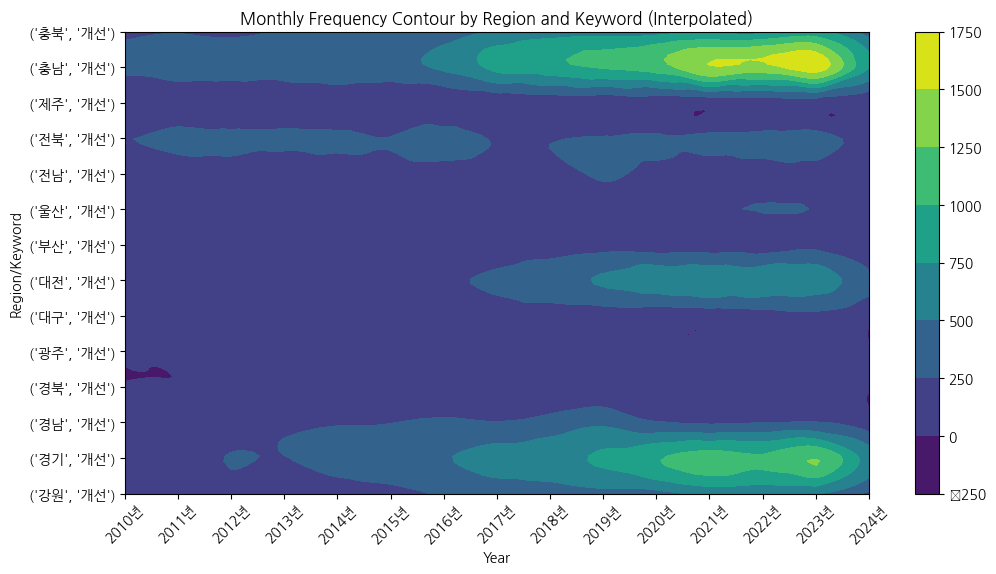

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
7,강원,체험교육,6,2,9,3,11,7,12,24,19,23,23,22,47,29,7
17,경기,체험교육,4,4,1,5,4,2,1,14,12,19,21,18,8,9,5


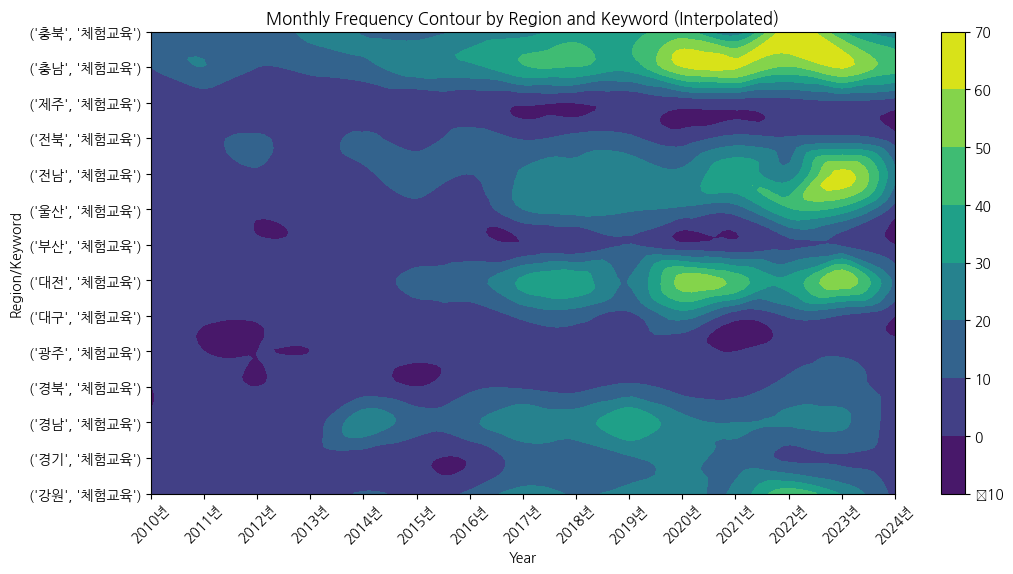

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
8,강원,콘텐츠,27,34,36,27,42,34,66,62,66,84,104,75,112,131,52
18,경기,콘텐츠,33,36,71,60,140,122,162,204,244,280,315,283,216,236,81


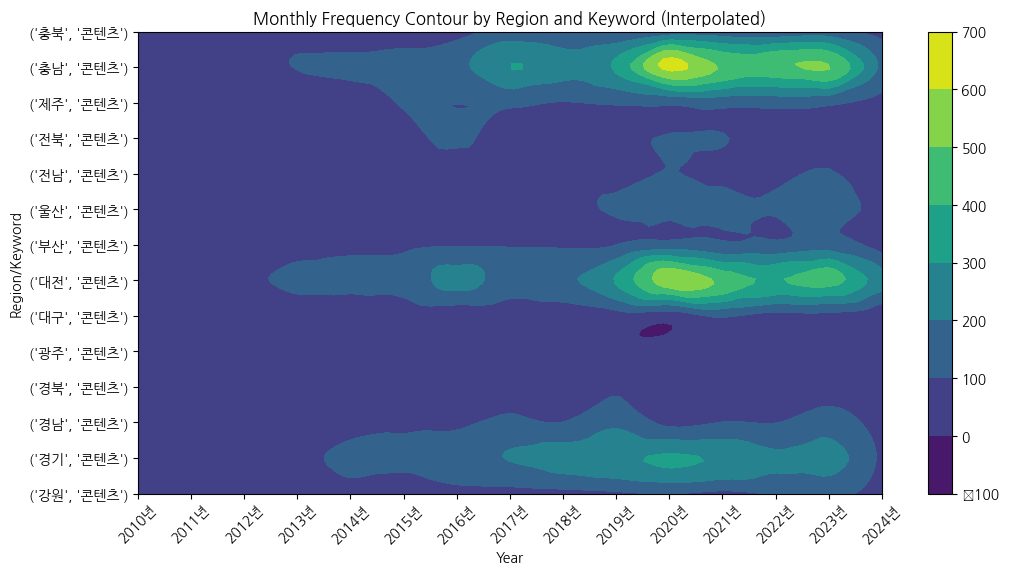

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
1,강원,고열량,5,12,12,4,7,9,10,17,14,2,6,16,6,4,2
11,경기,고열량,10,3,7,2,2,3,2,5,4,2,4,2,0,0,0


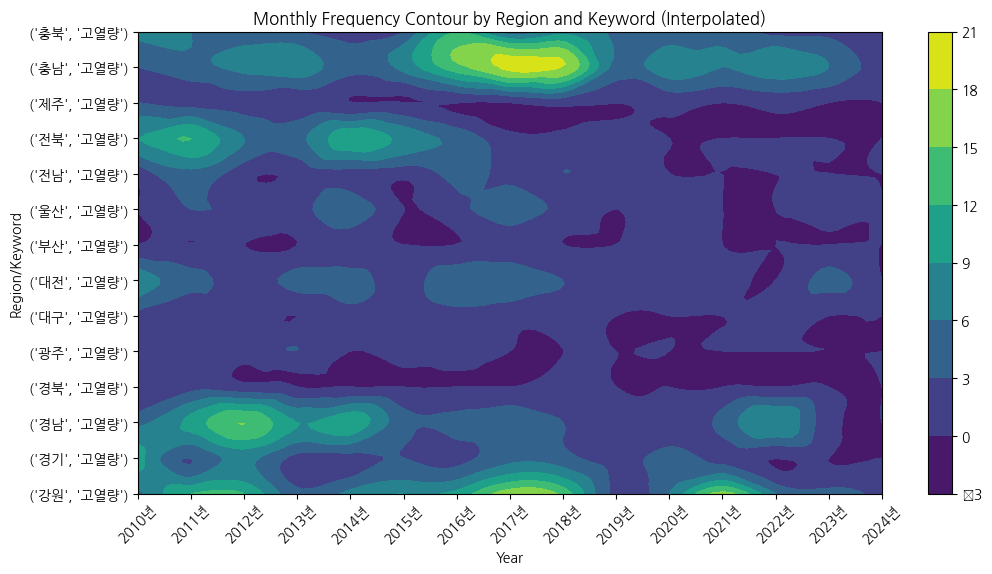

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
4,강원,식습관,38,70,47,46,81,80,87,87,80,70,39,46,41,42,15
14,경기,식습관,17,23,24,17,21,22,33,37,38,47,42,48,42,71,60


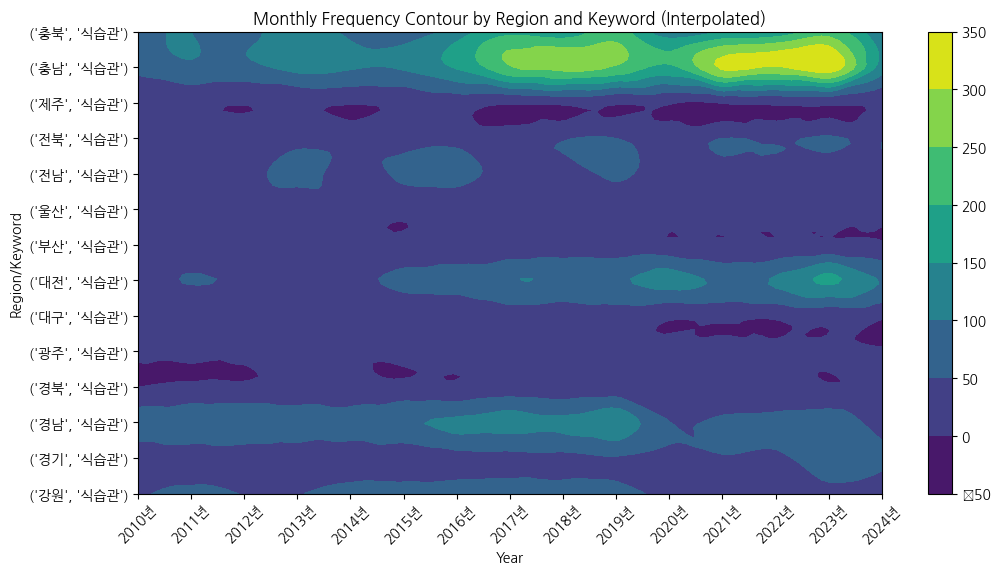

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
2,강원,광고,115,185,133,180,98,147,205,202,192,162,192,235,241,293,186
12,경기,광고,78,102,108,147,96,161,125,136,207,239,242,163,299,273,85


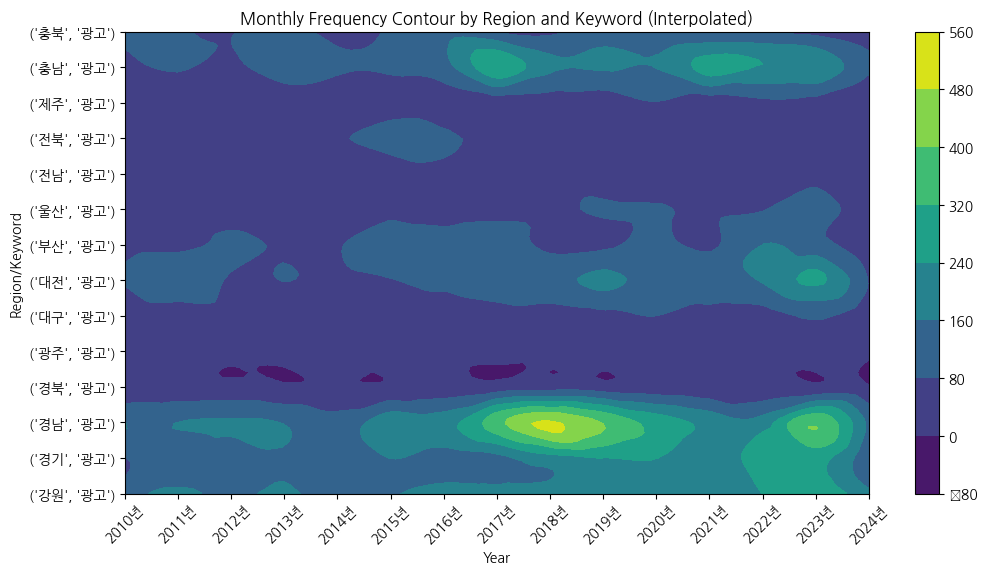

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
3,강원,급식기준,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
13,경기,급식기준,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


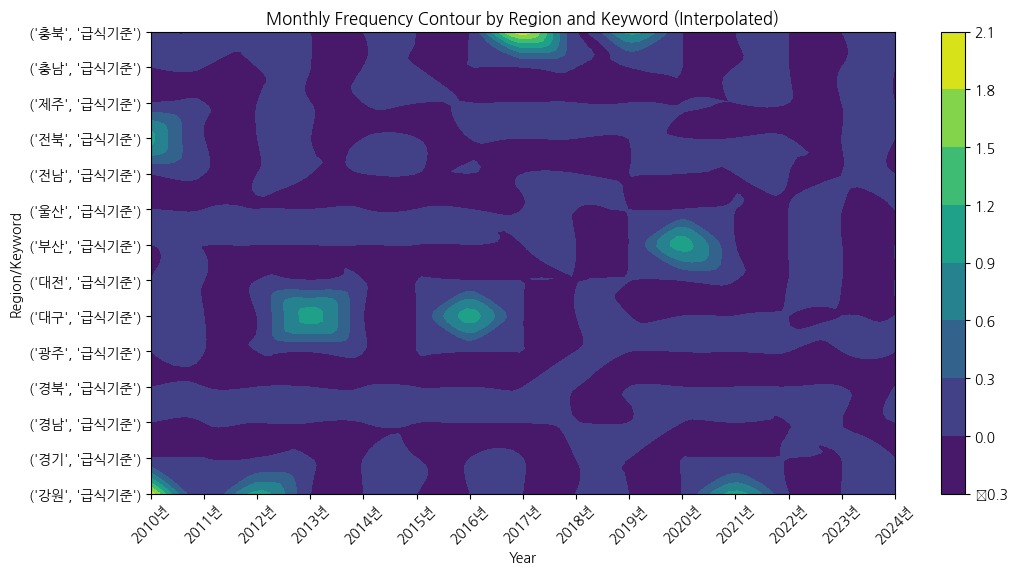

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
9,강원,품질관리,120,121,140,175,121,93,78,105,107,115,139,163,137,171,88
19,경기,품질관리,39,65,43,53,61,42,57,76,99,91,109,100,66,112,45


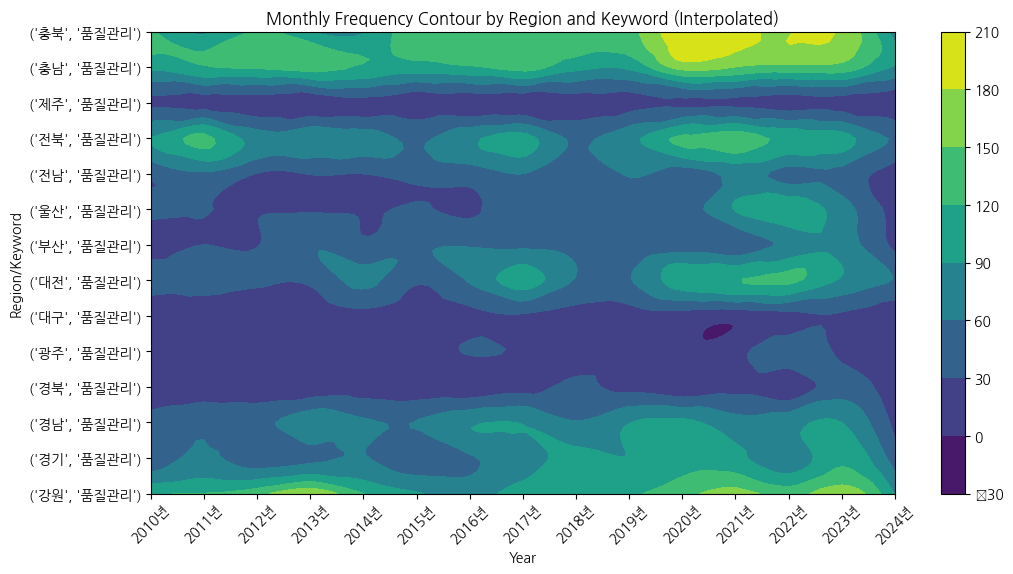

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
5,강원,어린이기호식품,1,3,1,2,2,0,2,0,4,1,5,3,0,2,1
15,경기,어린이기호식품,0,0,0,0,0,1,0,0,0,3,0,0,0,2,0


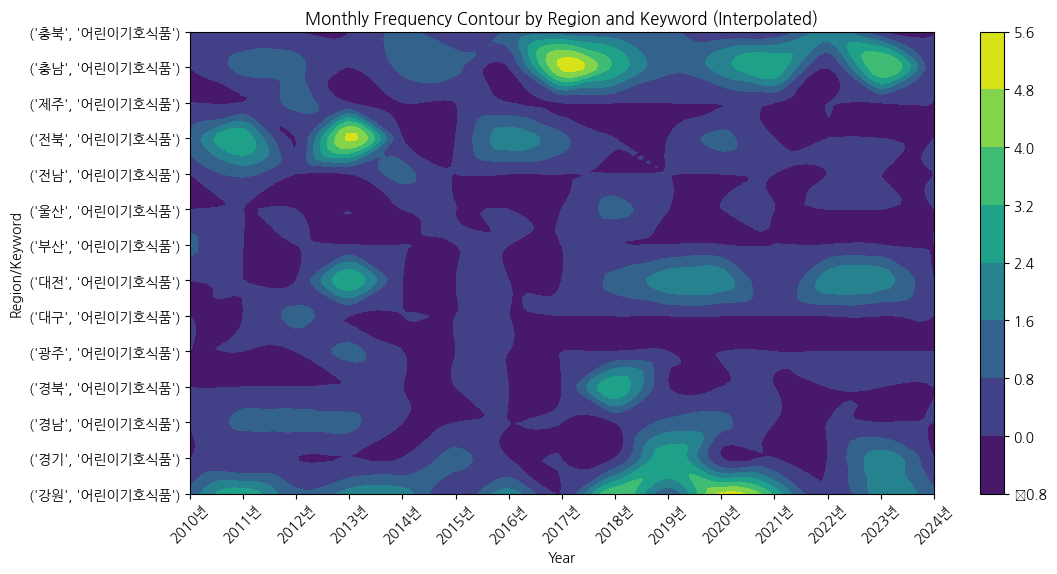

,Region,Keyword,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
6,강원,지속가능한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,경기,지속가능한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


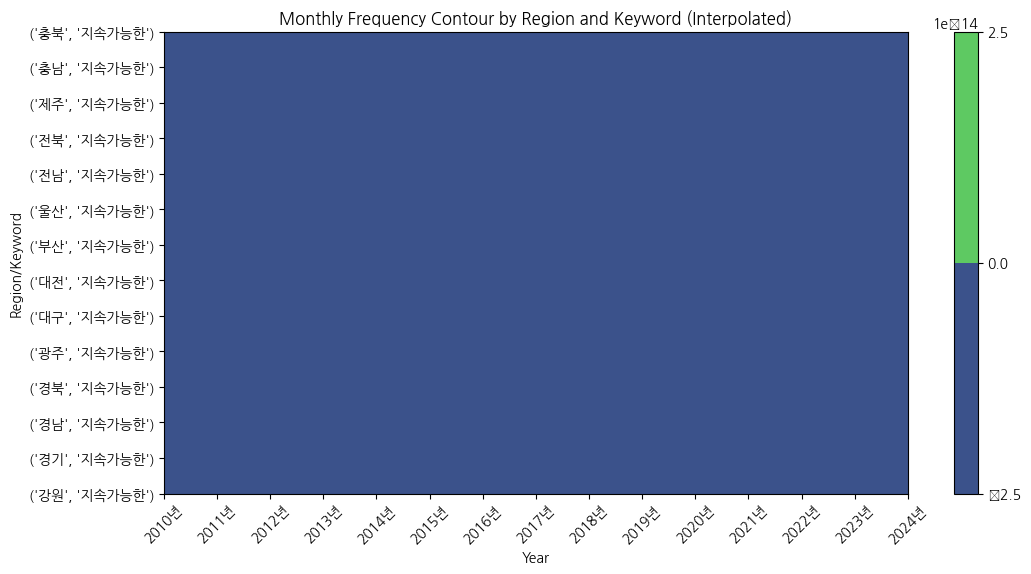

In [23]:
import os
os.makedirs('/content/drive/MyDrive/이대과제/image/', exist_ok=True)

for text in search_words_random:
    sf= terra_data(text)
    display(sf.head(2))
    terra_data_contour(sf, text)

## **3. 종합계획 차수별 년도별 검색어 출현빈도**
### **corpus정제 사용자함수**

In [ ]:
# corpus 정제
import re

def preprocess_corpus(corpus):
    updated_corpus = []
    pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])')
    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')

    for document in corpus:
        if isinstance(document, str):
            words = document.split(',')
            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]
            updated_corpus.append(','.join(filtered_words))
        else:
            updated_corpus.append('')
    return updated_corpus

In [ ]:
## 검색어 뽑기
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)
# Convert each column to a list
columns_as_lists = {col.split('어린이')[0].strip(): keywords_df[col].to_list() for col in keywords_df}
columns_as_lists.keys()

dict_keys(['제1차', '제2차', '제3차', '제4차', '제5차', '제6차'])

In [ ]:
from collections import defaultdict
from tqdm import tqdm_notebook
result_dict = defaultdict(dict)

plans = list(columns_as_lists.keys())
# plans --> ['제1차', '제2차', '제3차', '제4차', '제5차', '제6차']
# 년도별로 반복
for key in tqdm_notebook(plans):
    # 시작년도, 끝년도 지정
    start_year = 2010
    end_year = 2024
    num = 500

    result_df = pd.DataFrame()

    # 관심주제어를 매년 키워드로 해서
    keyword_list = columns_as_lists[key]

    # 녇도별 문서 추출 후 키워드 빈도수 분석
    result_df1 = pd.DataFrame()

    # 년도에 해당되는 출현빈도
    for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
        print(f'{key} 어린이식생활안전관리 종합계획 {year}년도 데이터 처리중......')
        start_date = str(year) + "-01-01"
        end_date = str(year) + "-12-31"
        dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
        temp_df = df[dt_index]


        corpus_yearly = []
        for keywords in temp_df['특성추출(가중치순 상위 50개)']:
            corpus_yearly.append(keywords)

        # 각 년도별 corpus 정제
        cleaned_corpus_yearly = preprocess_corpus(corpus_yearly)

        s_corpus_str = "".join(cleaned_corpus_yearly)

        result_list = []

        for k in keyword_list:
            result_list.append(s_corpus_str.count(k))

        temp_df = pd.DataFrame(result_list,columns=[str(year)])
        result_df1 = pd.concat([result_df1,temp_df], axis=1)

    result_df1.index =  keyword_list

    display(result_df1)

    result_df1.to_excel(f'{key}' +'종합계획_키워드 추이' + '.xlsx')
    result_dict[key] = result_df1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

제1차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
바른 영양,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
건강한 어린이,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
식품표시,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
HACCP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
품질관리,26,20,28,25,18,27,35,35,26,22,43,37,29,42,18


  0%|          | 0/15 [00:00<?, ?it/s]

제2차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전보호구역,8,3,8,11,4,5,5,5,1,3,1,7,2,2,4
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0
식생활교육,4,3,4,9,7,9,19,14,17,18,23,24,29,17,3
협력강화,1,1,3,1,1,4,3,4,1,4,4,0,0,3,0
지자체 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
예방관리,6,7,4,16,10,10,18,31,22,27,25,10,21,22,11
식품안전성,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
위생수준,4,5,5,7,3,7,7,7,6,11,2,1,4,6,0


  0%|          | 0/15 [00:00<?, ?it/s]

제3차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
고카페인 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
알레르기 표시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
급식관리지원센터,0,10,10,23,25,53,40,44,62,68,52,54,50,85,28
저당음료,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
나트륨 저감화,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양표시 개선,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식품안전성,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
급식위생,2,2,7,0,0,7,7,4,1,0,3,0,4,2,1


  0%|          | 0/15 [00:00<?, ?it/s]

제4차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전,28,31,22,32,30,42,47,67,54,65,47,46,44,61,30
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
저염식품,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
알레르기 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
광고 관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
안전관리,60,62,61,104,125,106,131,136,147,175,217,208,277,289,128
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0


  0%|          | 0/15 [00:00<?, ?it/s]

제5차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
저염식품,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
저당식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
알레르기,3,3,11,9,11,6,5,9,8,11,4,7,14,7,8
스마트 급식관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
온라인 환경,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
맞춤형 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


  0%|          | 0/15 [00:00<?, ?it/s]

제6차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,4,4,10,6,1,3,8,7,16,7,8,6,5,4,1
단체급식,6,7,8,11,5,11,14,9,11,6,6,16,9,16,3
영양표시,2,1,3,0,4,1,0,0,0,1,1,2,1,3,0
고열량 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자율협약,1,0,0,2,0,0,3,2,0,1,0,0,0,0,0
빅데이터,0,0,3,7,34,54,76,140,132,175,259,280,242,230,85
영양교육,9,20,16,10,14,22,34,40,34,26,35,32,26,44,17
안전관리,60,62,61,104,125,106,131,136,147,175,217,208,277,289,128
식품안전법,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
